In [39]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor  
from statsmodels.tsa.arima.model import ARIMA  
from sklearn.metrics import mean_squared_error  

In [3]:
data = pd.read_csv("instagram_reach.csv", encoding = 'latin1')

In [6]:
data.head(5)


,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where itâs going. We just have t...,880,Â #deckÂ .#macÂ #macintosh#sayhelloÂ #appleÂ #...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswhoÂ #aitradingÂ #aiÂ #aitradingteam#ins...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iotÂ #cre#workplaceÂ #CDOÂ #bigdataÂ #technol...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearningÂ #instabigdata#instamark...,3 hours,30


In [7]:
data.shape

(100, 8)

In [8]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         100 non-null    int64 
 1   S.No               100 non-null    int64 
 2   USERNAME           100 non-null    object
 3   Caption            94 non-null     object
 4   Followers          100 non-null    int64 
 5   Hashtags           100 non-null    object
 6   Time since posted  100 non-null    object
 7   Likes              100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


In [9]:
## Checking Null Values
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [10]:
data = data.dropna()

In [11]:
data.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              0
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [12]:
## Checking All Columns name present in dataset
data.columns

Index(['Unnamed: 0', 'S.No', 'USERNAME', 'Caption', 'Followers', 'Hashtags',
       'Time since posted', 'Likes'],
      dtype='object')

In [13]:
data.head(3)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where itâs going. We just have t...,880,Â #deckÂ .#macÂ #macintosh#sayhelloÂ #appleÂ #...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswhoÂ #aitradingÂ #aiÂ #aitradingteam#ins...,2 hours,25


In [14]:
# Remove unnecessary columns
data= data.drop(['Unnamed: 0', 'S.No'], axis=1)

In [15]:
data.columns

Index(['USERNAME', 'Caption', 'Followers', 'Hashtags', 'Time since posted',
       'Likes'],
      dtype='object')

In [17]:
data.head(4)

,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,drgorillapaints,We all know where itâs going. We just have t...,880,Â #deckÂ .#macÂ #macintosh#sayhelloÂ #appleÂ #...,2 hours,23
2,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswhoÂ #aitradingÂ #aiÂ #aitradingteam#ins...,2 hours,25
3,opensourcedworkplace,sfad,340,#iotÂ #cre#workplaceÂ #CDOÂ #bigdataÂ #technol...,3 hours,49


# EDA and Analyzing Instagram Reach

In [19]:
from sklearn.preprocessing import OneHotEncoder
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
warnings.filterwarnings('ignore')

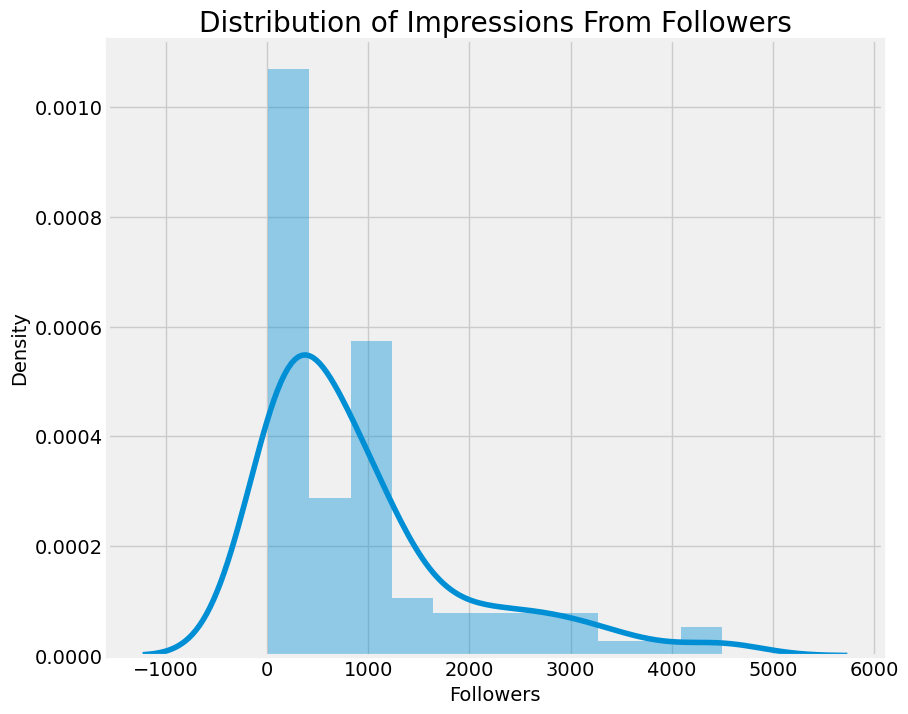

In [20]:
## Distribution of Impressions From Followers

plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Followers")
sns.distplot(data['Followers'])
plt.show()

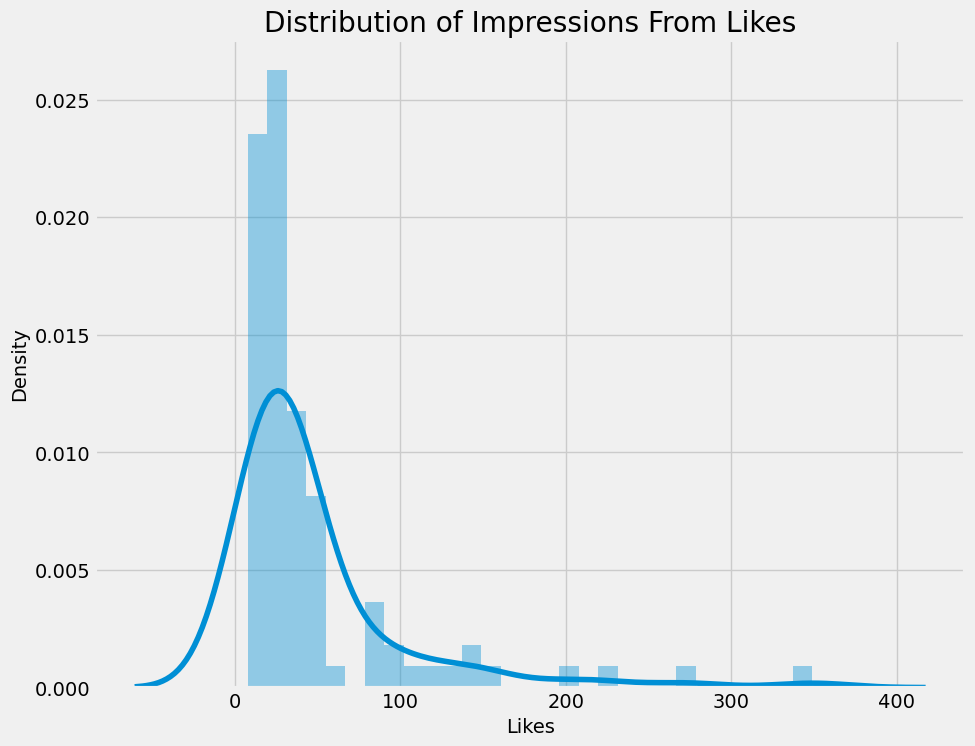

In [29]:
## Distribution of Impressions From Likes

plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Likes")
sns.distplot(data['Likes'])
plt.show()

In [30]:
# Select the relevant features and target variables

features = ['USERNAME', 'Caption', 'Hashtags', 'Followers']
target_likes = 'Likes'
target_time_since_posted = 'Time since posted'

In [31]:
# Split the data into training and testing sets

X = data[features]
y_likes = data[target_likes]
y_time_since_posted = data[target_time_since_posted]
X_train, X_test, y_likes_train, y_likes_test, y_time_since_posted_train, y_time_since_posted_test = train_test_split(X, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

In [32]:
# Preprocess the text features using one-hot encoding
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

# Train a model to predict the number of likes:

In [33]:
# Train a model to predict the number of likes
likes_model = LinearRegression()
likes_model.fit(X_train_encoded, y_likes_train)
likes_predictions = likes_model.predict(X_test_encoded)
likes_mse = mean_squared_error(y_likes_test, likes_predictions)
print("Mean Squared Error (Likes):", likes_mse)

Mean Squared Error (Likes): 1769.710912389252


# Train a model to predict the time since posted

In [37]:
# Preprocess the time since posted variable
def extract_numerical_value(time_string):
    numerical_value = re.findall(r'\d+', time_string)[0]
    return int(numerical_value)

In [34]:
y_time_since_posted_train = y_time_since_posted_train.apply(extract_numerical_value)
y_time_since_posted_test = y_time_since_posted_test.apply(extract_numerical_value)

In [38]:
# Train a model to predict the time since posted
time_since_posted_model = LinearRegression()
time_since_posted_model.fit(X_train_encoded, y_time_since_posted_train)
time_since_posted_predictions = time_since_posted_model.predict(X_test_encoded)
time_since_posted_mse = mean_squared_error(y_time_since_posted_test, time_since_posted_predictions)
print("Mean Squared Error (Time Since Posted):", time_since_posted_mse)

Mean Squared Error (Time Since Posted): 13.192419971206911
